# Ridge & Lasso

- Linear와 Ridge, Lasso 결과 비교
- Ridge와 Lasso 결과 비교

In [8]:
from mglearn.datasets import load_extended_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [9]:
X, y = load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

n_data = 506  /  n_feature = 104  /  n_target = 1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 104), (404,), (102, 104), (102,))

##### regularization parameter : alpha  
alpha값을 바꿔가면서 결과를 비교해보자.

In [12]:
model_linear = LinearRegression().fit(X_train, y_train)
model_ridge = Ridge(alpha=0.1).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.1).fit(X_train, y_train)

In [13]:
#각 모델의 trainset & testset accuracy
acc_linear_tr = model_linear.score(X_train, y_train)
acc_linear_ts = model_linear.score(X_test, y_test)

acc_ridge_tr = model_ridge.score(X_train, y_train)
acc_ridge_ts = model_ridge.score(X_test, y_test)

acc_lasso_tr = model_lasso.score(X_train, y_train)
acc_lasso_ts = model_lasso.score(X_test, y_test)

In [14]:
print('LinearRegression Accuracy:\ntrain:{:.4f}, test:{:.4f}'.format(acc_linear_tr,
                                                            acc_linear_ts))
print()
print('RidgeRegression Accuracy:\ntrain:{:.4f}, test:{:.4f}'.format(acc_ridge_tr,
                                                            acc_ridge_ts))
print()
print('LassoRegression Accuracy:\ntrain:{:.4f}, test:{:.4f}'.format(acc_lasso_tr,
                                                            acc_lasso_ts))

LinearRegression Accuracy:
train:0.9355, test:0.8154

RidgeRegression Accuracy:
train:0.9059, test:0.8721

LassoRegression Accuracy:
train:0.7277, test:0.7765


In [15]:
import numpy as np

In [16]:
coef_lin = model_linear.coef_

weight_over10_lin = coef_lin[abs(coef_lin) >= 10]

print('linearRegression')
print('n_weight: {}'.format(coef_lin.shape))
print('mag_weight: {:.2f}'.format(np.mean(np.square(coef_lin))))
print('n_weight_over10: {} of 104'.format(len(weight_over10_lin)))

linearRegression
n_weight: (104,)
mag_weight: 122238.25
n_weight_over10: 79 of 104


In [17]:
coef_rid = model_ridge.coef_

weight_over10_rid = coef_rid[abs(coef_rid) >= 10]

print('RidgeRegression')
print('n_weight: {}'.format(coef_rid.shape))
print('mag_weight: {:.2f}'.format(np.mean(np.square(coef_rid))))
print('n_weight_over10: {} of 104'.format(len(weight_over10_rid)))

RidgeRegression
n_weight: (104,)
mag_weight: 66.65
n_weight_over10: 18 of 104


In [18]:
coef_las = model_lasso.coef_

weight_over10_las = coef_las[abs(coef_las) >= 10]

weight_non0_las = coef_las[abs(coef_las) != 0]

print('LassoRegression')
print('n_weight: {}'.format(coef_las.shape))
print('mag_weight: {:.2f}'.format(np.mean(np.square(coef_las))))
print('n_weight_over10: {} of 104'.format(len(weight_over10_las)))
print('n_weight_non0: {} of 104'.format(len(weight_non0_las)))

LassoRegression
n_weight: (104,)
mag_weight: 6.65
n_weight_over10: 2 of 104
n_weight_non0: 8 of 104


alpha 0 ~ 1 까지 바꿔가며 결과 시각화 해보기

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [28]:
regularization = np.linspace(0, 1, 100) #0, 0.01, 0.02 ~~

In [29]:
acc_lin = LinearRegression().fit(X_train, y_train).score(X_test, y_test)

acc_ridge, acc_lasso = [], []
for reg in regularization:
    ridge = Ridge(alpha=reg).fit(X_train, y_train).score(X_test, y_test)
    lasso = Lasso(alpha=reg).fit(X_train, y_train).score(X_test, y_test)
    acc_ridge.append(ridge)
    acc_lasso.append(lasso)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


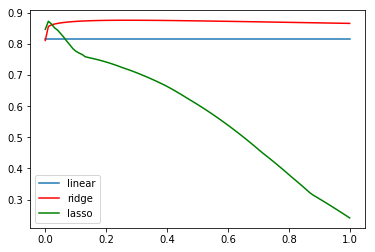

In [30]:
plt.plot([0, 1], [acc_lin, acc_lin], label='linear')
plt.plot(regularization, acc_ridge, c='r', label='ridge')
plt.plot(regularization, acc_lasso, c='g', label='lasso')
plt.legend(loc='best')
plt.show()

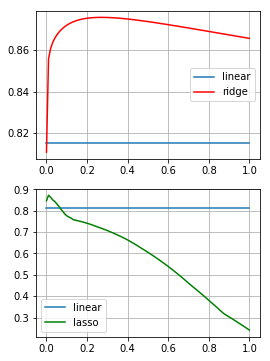

In [32]:
plt.figure(figsize=(4,6))
plt.subplot(211)
plt.plot([0, 1], [acc_lin, acc_lin], label='linear')
plt.plot(regularization, acc_ridge, c='r', label='ridge')
plt.legend(loc='best')
plt.grid()

plt.subplot(212)
plt.plot([0, 1], [acc_lin, acc_lin], label='linear')
plt.plot(regularization, acc_lasso, c='g', label='lasso')
plt.legend(loc='best')
plt.grid()

plt.show()

###### 좀 더 섬세하게 그리기

In [34]:
#matplotlib에서 한글 사용하기위한 코드
from matplotlib import font_manager, rc
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)

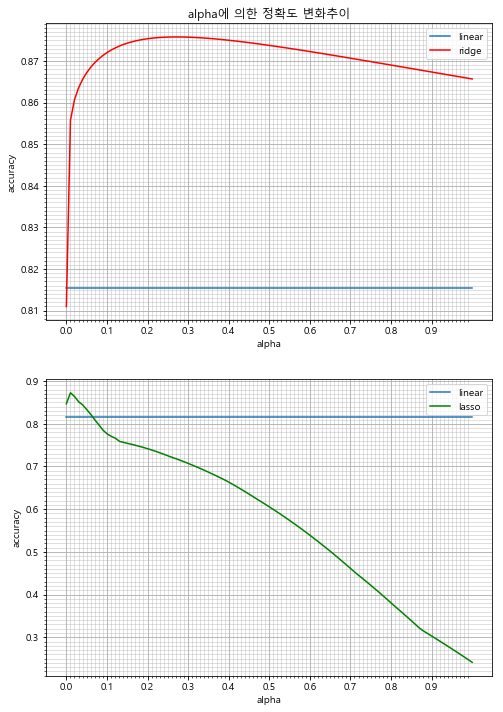

In [35]:
#ridge
plt.figure(figsize=(8,12))
ax = plt.subplot(211)

#세부적으로 격자를 표시하기 위한 코드
major_xticks = np.arange(0, 1, 0.1)
minor_xticks = np.arange(0, 1, 0.01)
major_yticks = np.arange(0, 1, 0.01)
minor_yticks = np.arange(0, 1, 0.001)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major')

#제목
plt.title('alpha에 의한 정확도 변화추이')

#x, y - label
plt.xlabel('alpha')
plt.ylabel('accuracy')

plt.plot([0, 1], [acc_lin, acc_lin], label='linear')
plt.plot(regularization, acc_ridge, c='r', label='ridge')
plt.legend(loc='best')

#lasso
ax = plt.subplot(212)

major_ticks = np.arange(0, 1, 0.1)
minor_ticks = np.arange(0, 1, 0.01)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major')

#x, y - label
plt.xlabel('alpha')
plt.ylabel('accuracy')

plt.plot([0, 1], [acc_lin, acc_lin], label='linear')
plt.plot(regularization, acc_lasso, c='g', label='lasso')
plt.legend(loc='best')



plt.show()

### ElasticNet : Ridge + Lasso 
L2 norm & L1 norm 모두 고려하여 regularization

#### ElasticNet의 규제항

li_ratio = li_norm의 비중  
ex) li_ratio = 1 -> elasticnet 규제항 = alpha\*l1_norm  
li_ratio = 0 -> elasticnet 규제항 = 0.5\*alpha*l2_norm 

In [36]:
from sklearn.linear_model import ElasticNet

In [49]:
model = ElasticNet(alpha=0.01, l1_ratio=0.1)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
model.score(X_test, y_test)

0.8302907453325463

homework) alpha와 l1_ratio의 변화에 따른 acc변화 추이를 시각화해보세요.